## Importing Libraries for Exercise:

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

## Setting Up Path & DFs:

In [2]:
# Create a path to where your data is stored.
path = r'C:\Users\steve\Documents\Machine_Learning_CF\Data_Set'

In [3]:
# Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'weather_scaled.csv'))
climate

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1           0.660514          -0.02793        0.826097   
1      19600102      1           0.244897          -0.02793        0.735760   
2      19600103      1           1.076130          -0.02793        1.277781   
3      19600104      1          -1.001953          -0.02793        1.458455   
4      19600105      1           0.244897          -0.02793        1.729466   
...         ...    ...                ...               ...             ...   
22945  20221027     10          -1.833187          -0.02793        0.284075   
22946  20221028     10           0.244897          -0.02793        0.103401   
22947  20221029     10          -0.586336          -0.02793        0.013064   
22948  20221030     10          -0.170720          -0.02793        0.374412   
22949  20221031     10          -0.170720          -0.02793        0.735760   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           -0.001949               -1.101066            -0.265148   
1           -0.001949               -1.058108             1.658760   
2           -0.001949               -1.251420             0.155707   
3           -0.001949               -0.821838            -0.445514   
4           -0.001949               -0.746661            -0.164944   
...               ...                     ...                  ...   
22945        1.037367               -0.005632            -0.004619   
22946        0.976231               -0.005632            -0.004619   
22947        0.716402               -0.005632            -0.004619   
22948        0.487141               -0.005632            -0.004619   
22949        0.196744               -0.005632            -0.004619   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0             -0.179228       -0.902918  ...             -0.443701   
1             -0.179228       -0.810126  ...              0.783085   
2             -0.179228       -1.065304  ...              0.783085   
3             -0.179228       -0.114186  ...              0.783085   
4             -0.179228        0.187388  ...             -1.670486   
...                 ...             ...  ...                   ...   
22945         -0.179228        0.720943  ...             -0.443701   
22946         -0.179228        0.187388  ...             -0.443701   
22947         -0.179228        0.349774  ...             -0.443701   
22948         -0.179228        0.280180  ...             -0.443701   
22949         -0.179228       -0.322968  ...             -0.443701   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...   

## Cleaning Up Data:
Creating a table with DATE MONTH and only the temperature means for each of the weather stations.

In [4]:
# Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [5]:
df

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101      1        -0.528623           -1.016876   
1      19600102      1        -0.582946           -1.107669   
2      19600103      1        -0.257010           -1.084971   
3      19600104      1        -0.555784           -1.209812   
4      19600105      1        -1.003946           -1.209812   
...         ...    ...              ...                 ...   
22945  20221027     10         0.747959            0.628750   
22946  20221028     10         0.856604            0.367720   
22947  20221029     10         0.856604            0.083991   
22948  20221030     10         0.680055            0.265577   
22949  20221031     10         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0 

In [6]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

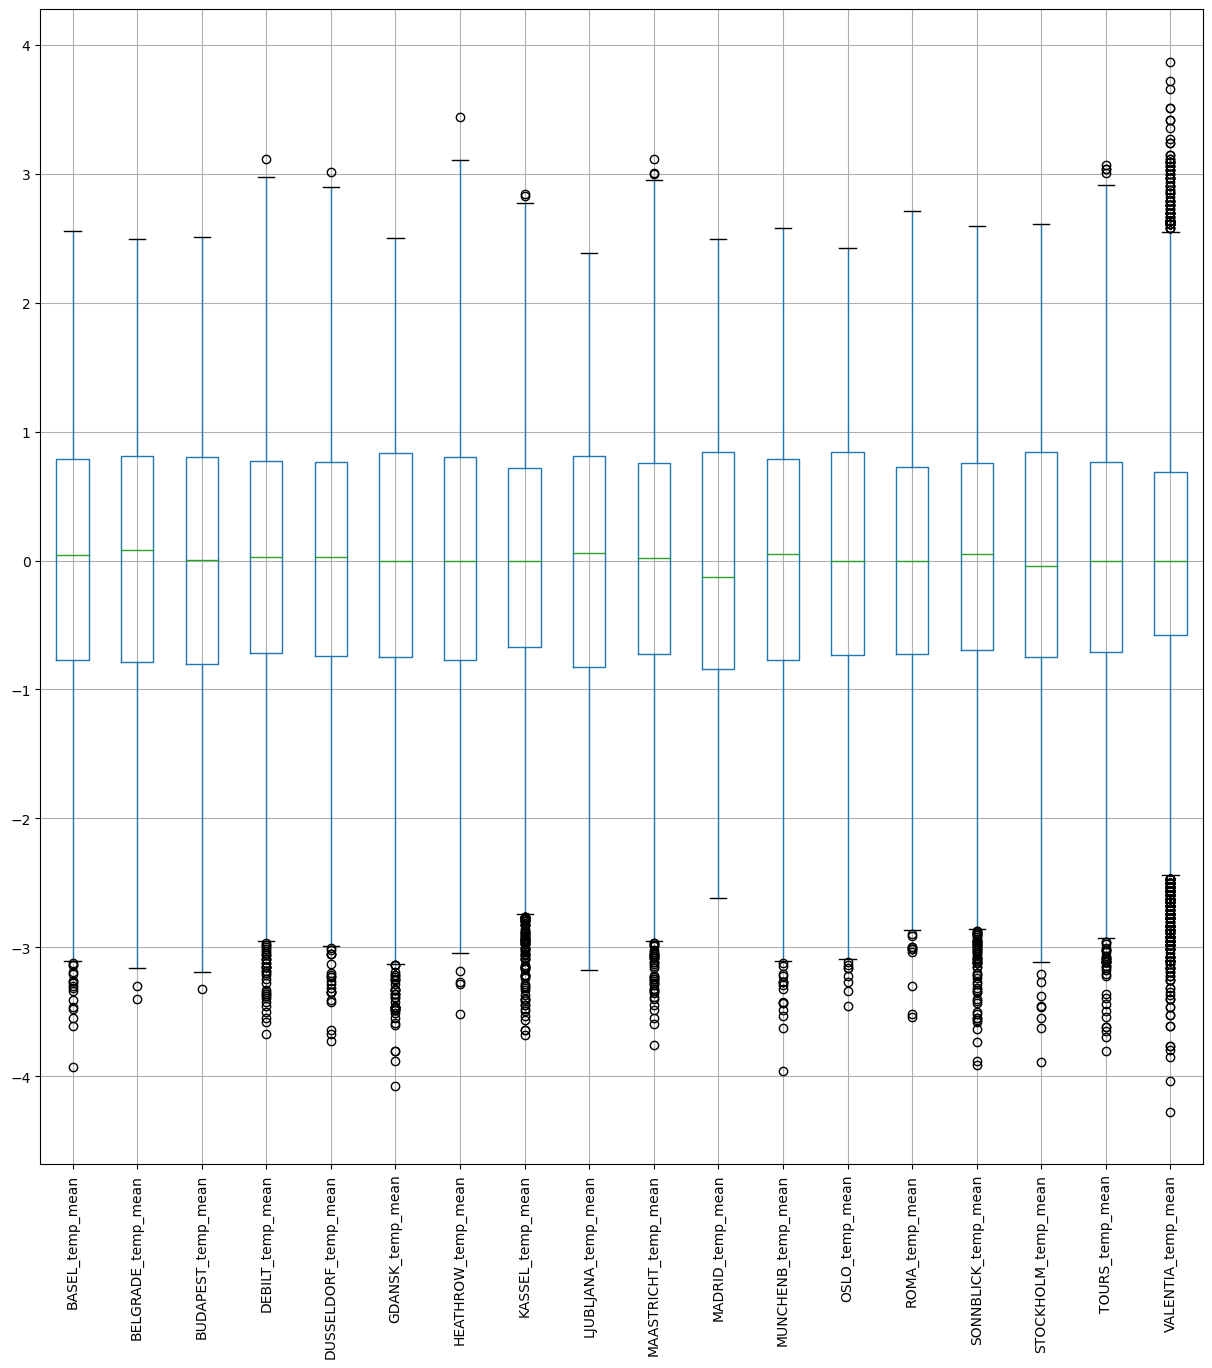

In [7]:
# Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

## Temperatures Over Time

Performing some data cleaning, searching for only DATE rows with the year 1960 within them.

In [8]:
# Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('1960')] #<-----INSERT YEAR HERE
dfyear

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0    19600101      1        -0.528623           -1.016876           -1.099163   
1    19600102      1        -0.582946           -1.107669           -1.110927   
2    19600103      1        -0.257010           -1.084971           -1.063873   
3    19600104      1        -0.555784           -1.209812           -1.146217   
4    19600105      1        -1.003946           -1.209812           -1.087400   
..        ...    ...              ...                 ...                 ...   
361  19601227     12        -1.289140           -1.277907           -1.440302   
362  19601228     12        -1.289140           -1.255208           -1.416775   
363  19601229     12        -1.207656           -1.221161           -1.122690   
364  19601230     12        -1.547172           -1.243859           -1.169744   
365  19601231     12        -1.139752           -1.107669           -1.216797   

     DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
0           -0.114356             -0.105836         -0.927601   
1           -0.367511             -0.370915         -0.825294   
2           -0.509912             -0.532908         -0.940389   
3           -0.525734             -0.577088         -1.042696   
4           -0.320045             -0.444548         -0.978754   
..                ...                   ...               ...   
361         -1.126979             -0.974707         -0.940389   
362         -1.522534             -1.283966         -0.978754   
363         -1.570001             -1.313420         -1.234521   
364         -1.316845             -1.372326         -0.889236   
365         -1.032045             -1.048340         -1.145003   

     HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
0             -0.106469         -0.182904            -1.370824   
1             -0.892676         -0.212437            -1.043881   
2             -0.490837         -0.389635            -0.741156   
3             -0.316124         -0.493001            -0.910682   
4             -0.403481         -0.552067            -0.862246   
..                  ...               ...                  ...   
361           -1.469228         -0.891697            -1.721985   
362           -1.469228         -1.054129            -1.479805   
363           -1.434286         -1.305160            -1.443478   
364           -1.084860         -1.393759            -1.273952   
365           -1.137274         -1.172261            -1.286061   

     MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
0               -0.097084         -0.988280           -0.265742   
1               -0.232112         -0.691740           -0.353714   
2               -0.487164         -0.853490           -0.403983   
3               -0.472161         -0.624345           -0.642763   
4               -0.307127         -0.381721           -0.906678   
..                    ...               ...                 ...   
361             -0.997267         -1.069155           -1.120324   
362             -1.342338         -1.338737           -1.321402   
363             -1.342338         -0.920885           -1.459643   
364             -1.177304         -0.772615           -1.547614   
365             -0.937255         -1.136550           -1.195728   

     OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  STOCKHOLM_temp_mean  \
0         -0.186575       -1.280450            -0.124331            -0.391072   
1         -0.368598       -0.539569            -0.650834            -0.415953   
2         -0.550620       -0.876333            -0.650834            -0.615003   
3         -0.417137       -0.775304            -0.943336            -0.764290   
4         -0.332193       -0.926848            -0.621584            -0.503037   
..              ...             ...                  ...                  ...   
361       -0.417137       -1.785596            -0.914086            -0.403513   
362      

In [9]:
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   1.960067e+07    6.513661        -0.102317           -0.032384   
std    3.457653e+02    3.455958         0.935826            0.920271   
min    1.960010e+07    1.000000        -3.190431           -2.401472   
25%    1.960040e+07    4.000000        -0.756099           -0.594120   
50%    1.960070e+07    7.000000        -0.053300            0.055618   
75%    1.960098e+07    9.750000         0.649499            0.662798   
max    1.960123e+07   12.000000         1.820830            1.843109   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.063919         -0.052666             -0.034416   
std              0.946637          0.910451              0.919531   
min             -2.416664         -2.645913             -2.874442   
25%             -0.675681         -0.668134             -0.661766   
50%             -0.005167         -0.011511             -0.002750   
75%              0.744750          0.692578              0.715174   
max              1.806397          1.847601              1.970619   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.067706           -0.103366          0.026208   
std            0.978767            0.919195          0.964448   
min           -2.922584           -2.307849         -3.446307   
25%           -0.825294           -0.840262         -0.666507   
50%           -0.096358           -0.071526          0.082894   
75%            0.757265            0.714681          0.802762   
max            1.834684            1.745486          2.002543   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.074499             -0.063840         -0.130480   
std               0.906193              0.902235          0.979590   
min              -2.714923             -3.247725         -2.322710   
25%              -0.738129             -0.712209         -0.890557   
50%              -0.002507              0.052946         -0.294107   
75%               0.699815              0.649317          0.787590   
max               1.668536              1.688278          1.936682   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.101680       -0.078422        0.092554   
std              0.938523        0.998018        1.002362   
min             -3.017997       -2.249500       -2.408610   
25%             -0.777863       -0.738711       -0.653227   
50%             -0.001827       -0.168373       -0.009165   
75%              0.626541        0.869157        1.110576   
max              1.858144        1.985564        1.952486   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.175958            -0.092804        -0.059940   
std               0.884235             0.988702         0.944029   
min              -3.502727            -2.356684        -3.112470   
25%              -0.764178            -0.798501        -0.692653   
50%              -0.124331            -0.179582         0.032900   
75%               0.475298             0.877867         0.683937   
max               1.967058             1.686504         1.938947   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.057276  
std              1.127911  
min             -2.951420  
25%             -0.848468  
50%             -0.037330  
75%              0.893978  
max              2.606381

In [10]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [11]:
# Plot ALL weather data for all stations for a year 

# X = weather station
# Y = day of the year
# Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

### Creating An Index for 366 Days
Its a leap year for 1960, so creating an index of 366 to apply the yearly weather records.  Going to look at each weather station one by one.

In [12]:
# We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
# We'll scale this by 100 as the index is made. This will help teh gradient descent converge 367 = 3.67

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [13]:
n_rows = dfyear.shape[0]
n_rows

366

In [14]:
# This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [15]:
X.shape, y.shape

((366, 2), (366, 1))

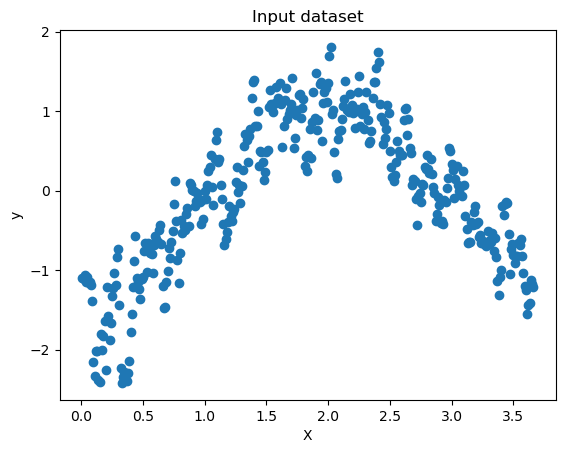

In [16]:
# Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['BUDAPEST_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [17]:
# what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['BUDAPEST_temp_mean'].min()

-2.416664326

In [18]:
# what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['BUDAPEST_temp_mean'].max()

1.806397421

In [19]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [20]:
compute_cost(X,y)

array([0.44887979])

In [21]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [22]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=10 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-10],[-5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 0 ns
Wall time: 6 ms


In [23]:
theta

array([[-5.45352334],
       [ 2.36772901]])

In [24]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [25]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.77 s
Wall time: 1.75 s


In [26]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [27]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [28]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=10 #<---start with the same iterations as above
theta_init=np.array([[1],[1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [29]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

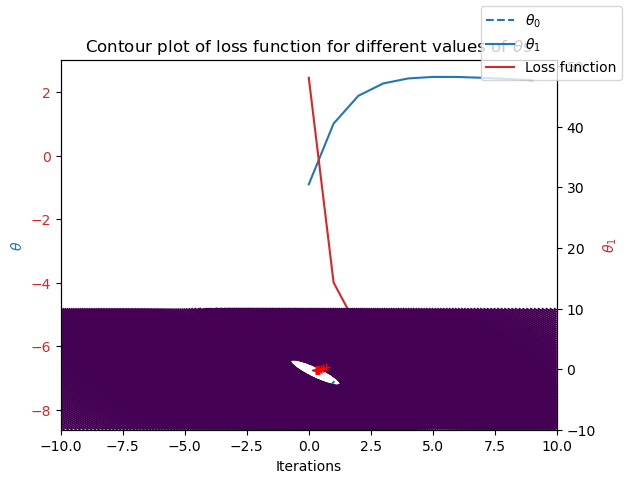

In [30]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

# End of Exercise for KASSEL Station
Going to repeat the process for two more weather stations.

In [31]:
# Using the same DF for the new year.
# Best practice is to create a new one, but for ease of replication, going to use the same df name.
dfyear = df[df['DATE'].astype(str).str.contains('1990')]
dfyear

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
10958  19900101      1        -1.696559           -1.584333   
10959  19900102      1        -1.655817           -1.538937   
10960  19900103      1        -1.710140           -1.527588   
10961  19900104      1        -1.506430           -1.788618   
10962  19900105      1        -1.411366           -2.083696   
...         ...    ...              ...                 ...   
11318  19901227     12        -0.515042           -1.005527   
11319  19901228     12        -0.895301           -1.107669   
11320  19901229     12        -0.012558           -1.289256   
11321  19901230     12         0.218313           -0.937432   
11322  19901231     12        -0.297752           -0.733147   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
10958           -1.369721         -1.506712             -1.490139   
10959           -1.428538         -1.427601             -1.269240   
10960           -1.440302         -1.301023             -1.460686   
10961           -1.616753         -1.538357             -1.401779   
10962           -1.687333         -1.063690             -1.107247   
...                   ...               ...                   ...   
11318           -1.299141         -0.589023             -0.842167   
11319           -1.169744         -0.810534             -0.753808   
11320           -1.463829         -0.240934             -0.400369   
11321           -1.263851         -0.604845             -0.503455   
11322           -1.063873         -0.873823             -0.768534   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
10958         -1.298463           -1.172216         -1.541424   
10959         -1.081061           -1.049918         -1.452825   
10960         -1.196156           -1.259573         -1.570958   
10961         -1.515865           -1.032446         -1.570958   
10962         -1.592595           -0.805320         -1.408526   
...                 ...                 ...               ...   
11318         -0.786929           -0.945090         -0.832631   
11319         -0.825294           -0.648078         -1.024596   
11320         -0.850871           -0.648078         -0.463468   
11321         -0.659045           -0.857734         -0.611133   
11322         -0.684622           -0.770377         -0.921230   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
10958            -1.479805             -1.447359         -0.974801   
10959            -1.528241             -1.342338         -1.136550   
10960            -1.382933             -1.387347         -1.069155   
10961            -1.516132             -1.642398         -1.136550   
10962            -1.794639             -1.237316         -1.082634   
...                    ...                   ...               ...   
11318            -1.177080             -0.772222         -0.840010   
11319            -1.092317             -0.862240         -0.907406   
11320            -1.080208             -0.247115         -0.853490   
11321            -0.801701             -0.532173         -0.893927   
11322            -0.947009             -0.802228         -0.961322   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
10958           -1.811529       -1.594218       -1.937140   
10959           -1.522480       -1.497139       -1.566700   
10960           -1.359104       -1.703431       -1.600376   
10961           -1.710990       -1.023880       -1.583538   
10962           -1.447075       -0.878261       -1.886626   
...                   ...             ...             ...   
11318           -0.491955       -0.659834       -1.246774   
11319           -1.057487       -0.805452       -1.263612   
11320           -0.077232       -0.684104       -1.566700   
11321           -0.240607       -1.145228       -0.960524   
11322           -0.466820       -1.569948       -0.741627   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
10

In [32]:
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.650000e+02  365.000000       365.000000          365.000000   
mean   1.990067e+07    6.526027         0.070861            0.043663   
std    3.454755e+02    3.452584         0.901173            0.898311   
min    1.990010e+07    1.000000        -1.818785           -2.537662   
25%    1.990040e+07    4.000000        -0.582946           -0.631005   
50%    1.990070e+07    7.000000         0.109668            0.152086   
75%    1.990100e+07   10.000000         0.734378            0.708194   
max    1.990123e+07   12.000000         1.997379            1.740967   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          365.000000        365.000000            365.000000   
mean             0.027964          0.139493              0.146131   
std              0.906770          0.839960              0.882042   
min             -2.357847         -1.633290             -1.607952   
25%             -0.640390         -0.525734             -0.532908   
50%              0.077177          0.154622              0.173970   
75%              0.724164          0.708400              0.763035   
max              1.876978          2.417201              2.765857   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000        365.000000   
mean           0.150405            0.152728          0.104417   
std            0.756431            0.942064          0.930487   
min           -1.592595           -1.888539         -1.748156   
25%           -0.518374           -0.630607         -0.625900   
50%            0.172198            0.138129          0.082894   
75%            0.786039            0.802037          0.762154   
max            1.898625            2.828705          2.475072   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean             -0.001047              0.095736          0.063753   
std               0.911890              0.885778          1.023386   
min              -2.266890             -1.747420         -1.743109   
25%              -0.704829             -0.607188         -0.799573   
50%              -0.002507              0.097955         -0.112140   
75%               0.663488              0.683074          0.993146   
max               1.801735              2.603464          2.165827   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000      365.000000   
mean             0.003406        0.144391        0.038743   
std              0.923807        0.825958        1.130786   
min             -2.490168       -1.933994       -2.088684   
25%             -0.680466       -0.477811       -0.893171   
50%              0.073577        0.080392       -0.051261   
75%              0.701946        0.857022        1.026385   
max              1.946116        1.767136        2.019839   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean              0.037507             0.131603         0.137621   
std               0.866875             0.789326         0.980101   
min              -2.435095            -1.572927        -2.139837   
25%              -0.519208            -0.552800        -0.649512   
50%               0.109671             0.081670         0.150558   
75%               0.665425             0.828105         0.856501   
max               1.879307             1.985078         2.644891   

       VALENTIA_temp_mean  
count          365.000000  
mean             0.135022  
std              1.096645  
min             -2.290492  
25%             -0.788384  
50%              0.142923  
75%              0.863935  
max              2.966887

In [33]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [34]:
# Plot ALL weather data for all stations for a year 

# X = weather station
# Y = day of the year
# Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [35]:
# We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
# We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [36]:
n_rows = dfyear.shape[0]
n_rows

365

In [37]:
# This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['KASSEL_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

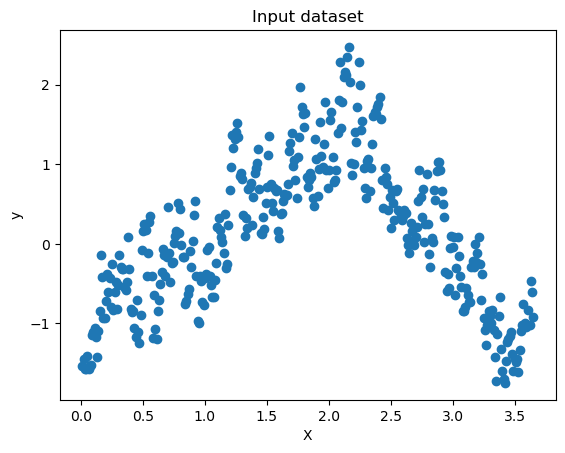

In [38]:
# Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['KASSEL_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [39]:
# what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['KASSEL_temp_mean'].min()

-1.748155886

In [40]:
# what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['KASSEL_temp_mean'].max()

2.475071996

In [41]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [42]:
compute_cost(X,y)

array([0.43716877])

In [43]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [44]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=10 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-10],[-5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 0 ns
Wall time: 6 ms


In [45]:
theta

array([[-5.32638149],
       [ 2.34464985]])

In [46]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [47]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.8 s
Wall time: 1.77 s


In [48]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [49]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=10 #<---start with the same iterations as above
theta_init=np.array([[1],[1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [50]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

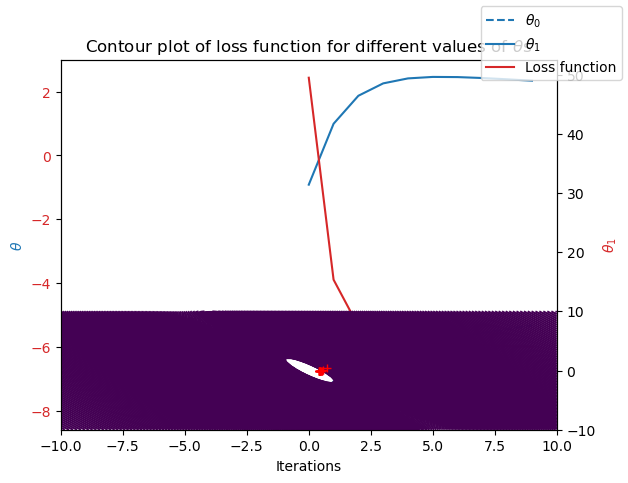

In [51]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

# End of Exercise for VALENTIA Station
Going to repeat the process for two more weather stations.

In [52]:
# Using the same DF for the new year.
# Best practice is to create a new one, but for ease of replication, going to use the same df name.
dfyear = df[df['DATE'].astype(str).str.contains('2000')]
dfyear

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
14610  20000101      1        -1.017527           -1.720523   
14611  20000102      1        -0.922462           -1.572984   
14612  20000103      1        -1.112591           -1.550286   
14613  20000104      1        -0.881720           -1.584333   
14614  20000105      1        -0.596526           -1.527588   
...         ...    ...              ...                 ...   
14971  20001227     12        -0.705172           -0.040850   
14972  20001228     12        -1.058269           -0.108944   
14973  20001229     12        -1.261978           -0.596958   
14974  20001230     12        -1.275559           -0.948781   
14975  20001231     12        -1.329882           -1.209812   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
14610           -1.957892         -0.620667             -0.959981   
14611           -1.804967         -0.430800             -0.621268   
14612           -1.475592         -0.256756             -0.444548   
14613           -1.499119         -0.573200             -0.429822   
14614           -1.357958         -0.889645             -0.812714   
...                   ...               ...                   ...   
14971           -0.863895         -1.744046             -1.372326   
14972           -0.652154         -1.506712             -1.416506   
14973           -0.840368         -1.490890             -1.534319   
14974           -1.087400         -1.316845             -1.387053   
14975           -1.228561         -1.601646             -1.401779   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
14610         -1.119426           -0.735435         -0.832631   
14611         -1.068273           -0.578193         -1.009829   
14612         -0.620680           -0.316124         -0.832631   
14613         -0.556739           -0.735435         -0.640666   
14614         -0.786929           -0.840262         -1.009829   
...                 ...                 ...               ...   
14971         -1.247310           -1.574056         -1.142728   
14972         -1.119426           -2.010837         -1.201794   
14973         -1.170580           -2.342792         -1.570958   
14974         -1.413558           -2.150608         -1.319926   
14975         -0.902024           -1.469228         -1.467592   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
14610            -1.879402             -0.682203         -1.284820   
14611            -1.407151             -0.592185         -1.338737   
14612            -1.334497             -0.502167         -1.540923   
14613            -1.734094             -0.427152         -1.433090   
14614            -1.661440             -0.742216         -1.931817   
...                    ...                   ...               ...   
14971            -0.523194             -1.537377         -1.096113   
14972            -0.523194             -1.402350         -1.284820   
14973            -0.934900             -1.492368         -0.853490   
14974            -1.104426             -1.432356         -1.069155   
14975            -1.358715             -1.342338         -1.365695   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
14610           -0.919246       -1.387925       -0.000746   
14611           -0.894111       -0.878261       -1.886626   
14612           -1.183161       -0.635564       -1.953979   
14613           -0.655331       -0.526351       -1.583538   
14614           -0.466820       -0.866127       -1.751920   
...                   ...             ...             ...   
14971           -1.032352       -1.169498       -0.388025   
14972           -0.931813       -1.205902       -0.691113   
14973           -1.220863       -1.302981       -0.825818   
14974           -1.183161       -1.667027       -1.330965   
14975           -1.472210       -2.395118       -0.994201   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
14

In [53]:
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   2.000067e+07    6.513661         0.189334            0.174319   
std    3.457653e+02    3.455958         0.876730            1.017296   
min    2.000010e+07    1.000000        -2.334850           -2.560360   
25%    2.000040e+07    4.000000        -0.484486           -0.596958   
50%    2.000070e+07    7.000000         0.191152            0.299625   
75%    2.000098e+07    9.750000         0.910926            0.912479   
max    2.000123e+07   12.000000         1.997379            2.285726   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean             0.111792          0.138324              0.107620   
std              0.989119          0.862365              0.861824   
min             -2.157869         -2.028846             -1.961391   
25%             -0.681562         -0.541556             -0.558680   
50%              0.235983          0.122978              0.107700   
75%              0.888852          0.819156              0.744627   
max              2.088719          2.512135              2.633317   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean           0.143232            0.065189          0.139297   
std            0.810899            0.900700          0.938943   
min           -2.359897           -2.342792         -2.309284   
25%           -0.467220           -0.630607         -0.552067   
50%            0.236139            0.033301          0.134577   
75%            0.821207            0.815141          0.920895   
max            1.809107            2.479279          2.401239   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean              0.176845              0.146490          0.010056   
std               0.951569              0.868501          0.961111   
min              -2.254781             -2.032478         -1.931817   
25%              -0.532276             -0.502167         -0.745657   
50%               0.294164              0.135463         -0.139098   
75%               0.917777              0.829354          0.871834   
max               1.959152              2.513446          1.950161   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean             0.198358        0.165535        0.102767   
std              0.907923        0.806532        1.072996   
min             -2.666111       -2.395118       -2.307581   
25%             -0.476246       -0.429272       -0.842657   
50%              0.224385        0.256347        0.108702   
75%              0.925017        0.817584        1.009546   
max              2.235165        1.633653        2.373441   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean              0.111589             0.143601         0.105552   
std               0.939300             0.814405         0.880330   
min              -2.698347            -2.170075        -2.139837   
25%              -0.541146            -0.537249        -0.539698   
50%               0.197422             0.243397        -0.006319   
75%               0.822644             0.815664         0.868267   
max               1.981683             1.786029         2.284075   

       VALENTIA_temp_mean  
count          366.000000  
mean             0.010196  
std              1.118192  
min             -2.801209  
25%             -0.848468  
50%             -0.067372  
75%              0.954062  
max              2.636423

In [54]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [55]:
# Plot ALL weather data for all stations for a year 

# X = weather station
# Y = day of the year
# Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [56]:
# We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
# We'll scale this by 100 as the index is made. This will help teh gradient descent converge 367 = 3.67

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [57]:
n_rows = dfyear.shape[0]
n_rows

366

In [58]:
# This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['VALENTIA_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

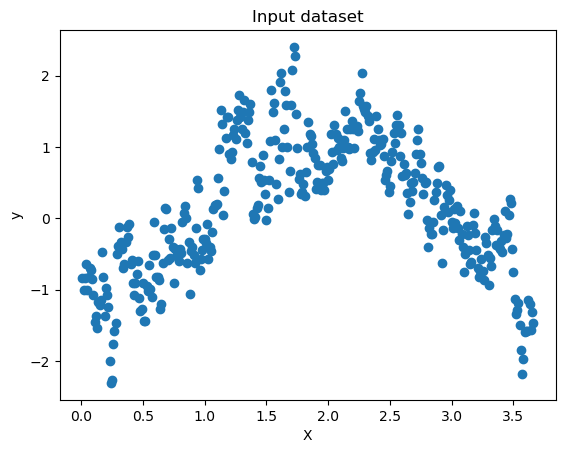

In [59]:
# Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['KASSEL_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [60]:
# what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['VALENTIA_temp_mean'].min()

-2.801208682

In [61]:
# what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['VALENTIA_temp_mean'].max()

2.636423154

In [62]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [63]:
compute_cost(X,y)

array([0.62352017])

In [64]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [65]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=10 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-10],[-5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 15.6 ms
Wall time: 5 ms


In [66]:
theta

array([[-5.41464835],
       [ 2.37175945]])

In [67]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [68]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.73 s
Wall time: 1.74 s


In [69]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [70]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=10 #<---start with the same iterations as above
theta_init=np.array([[1],[1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [71]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

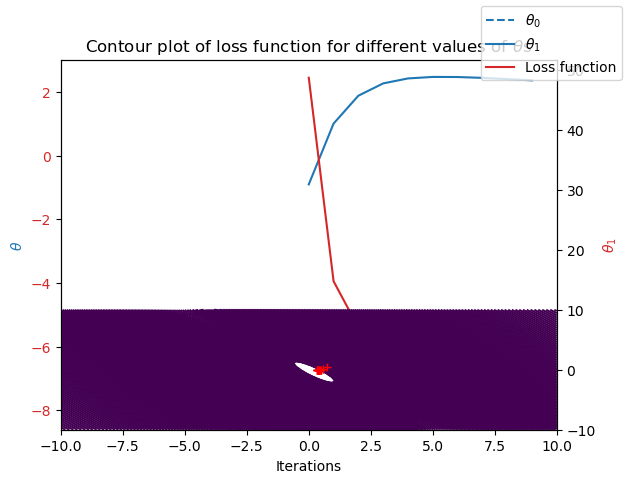

In [72]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()